# comparing artifact drift with txt flash index

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
m3_413590 = np.array([ 0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,  1.,  1.,
        2.,  1.,  2.,  2.,  1.,  2.,  3.,  1.,  2.,  2.,  2.,  3.,  2.,
        3.,  1.,  2.,  2.,  2.,  3.,  2.,  3.,  2.,  3.,  3.,  3.,  3.,
        2.,  3.,  2.,  3.,  3.,  4.,  2.,  3.,  2.,  3.,  3.,  3.,  4.,
        3.,  3.,  4.,  3.,  4.,  4.,  3.,  4.,  4.,  5.,  3.,  4.,  5.,
        3.,  4.,  4.,  5.,  4.,  5.,  4.,  5.,  4.,  5.,  4.,  5.,  4.,
        5.,  4.,  5.,  5.,  6.,  5.,  5.,  6.,  4.,  5.,  4.,  5.,  5.,
        5.,  6.,  4.,  5.,  5.,  4.,  5.,  5.,  6.,  5.,  6.,  6.,  5.,
        6.,  6.,  7.,  6.,  5.,  6.,  6.,  6.,  7.,  5.,  6.,  6.,  7.,
        7.,  6.,  6.,  7.,  7.,  6.,  7.,  6.,  7.,  8.,  6.,  7.,  7.,
        7.,  8.,  7.,  8.,  6.,  7.,  7.,  8.,  7.,  8.,  8.,  8.,  7.,
        8.,  7.,  8.,  8.,  7.,  8.,  7.,  8.,  8.,  8.,  9.,  8.,  9.])

In [4]:
m7_413590 = np.array([ 0.,  0.,  1.,  0., -1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,
        1.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  3.,  3.,  3.,  3.,  4.,
        2.,  2.,  3.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  3.,
        3.,  3.,  4.,  3.,  4.,  4.,  4.,  5.,  4.,  4.,  5.,  4.,  3.,
        4.,  4.,  5.,  4.,  5.,  4.,  5.,  4.,  5.,  4.,  5.,  4.,  5.,
        5.,  6.,  4.,  5.,  4.,  5.,  5.,  5.,  6.,  4.,  5.,  5.,  5.,
        5.,  6.,  5.,  6.,  5.,  5.,  5.,  5.,  5.,  6.,  5.,  6.,  6.,
        7.,  5.,  6.,  5.,  6.,  6.,  7.,  6.,  7.,  5.,  6.,  6.,  7.,
        6.,  7.,  6.,  7.,  6.,  6.,  7.,  7.,  8.,  6.,  7.,  6.,  7.,
        7.,  8.,  7.,  8.,  6.,  7.,  6.,  7.,  7.,  8.,  7.,  8.,  7.,
        8.,  7.,  8.,  7.,  8.,  7.,  8.])

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_arrays_with_lines(arrays, colors=None, labels=None):
    """
    Plot lines of best fit and connected individual points for multiple arrays.

    Parameters:
    - arrays (list of numpy arrays): List of arrays to plot.
    - colors (list of str, optional): List of colors for each array. Default is None.
    - labels (list of str, optional): List of labels for each array. Default is None.
    """
    num_arrays = len(arrays)
    if colors is None:
        colors = ['C{}'.format(i) for i in range(num_arrays)]
    if labels is None:
        labels = ['Array {}'.format(i+1) for i in range(num_arrays)]

    min_length = min(len(arr) for arr in arrays)
    indices = np.arange(min_length)

    plt.figure(figsize=(8, 6))

    for i in range(num_arrays):
        array = arrays[i][:min_length]  # Ensure all arrays have the same length
        color = colors[i]
        label = labels[i]

        slope, intercept = np.polyfit(indices, array, 1)

        # Plot line of best fit
        plt.plot(indices, slope * indices + intercept, color=color, linestyle='--', label=f'{label} (Best Fit)')

        # Plot line connecting individual points
        plt.plot(indices, array, color=color, linestyle='-', alpha=0.3)

    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Lines of Best Fit and Connected Individual Points')
    
    # Set custom tick positions for a spaced out x-axis
    tick_positions = np.arange(0, min_length, step=min_length//10)
    plt.xticks(tick_positions)
    
    plt.yticks(np.arange(int(np.min(arrays)), int(np.max(arrays))+1))
    plt.legend()
    plt.box(False)
    plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

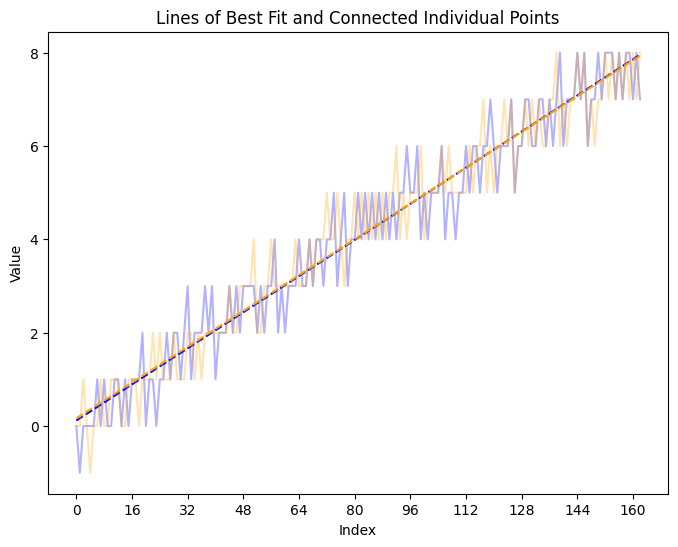

In [14]:
plot_arrays_with_lines([m3_413590, m7_413590], colors=['blue', 'orange'], labels=['m3_413590', 'm7_413590'])